### Pearson’s Correlation Between Experimental Properties and DC

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# Replace this with the path to your Excel file
data_file = 'C:/Users/jhyan/Documents/all/Li_research/projects/pa_membrane/Polyamide Membrane Database/select_pa_mem XPS-v3.xlsx'

total_columns = 7
columns_to_use = range(total_columns - 1)

# Load data from the specified Excel file into a Pandas DataFrame
# This assumes the data is in the first sheet of the Excel file, you might need to adjust 'sheet_name'
df = pd.read_excel(data_file, sheet_name=0, header=1, usecols=columns_to_use, na_values='N. A.')

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Print the column names
print(df.columns)

# Print the number of rows in the filtered DataFrame
print(f"Number of rows in the DataFrame: {df.shape[0]}")

Index(['O/N\n(%)', 'F (L m-2  h-1\nbar-1)', 'R (NaCl)\n(%)',
       'B (NaCl)\n(L m-2  h-1)', 'Thickness (nm)',
       'Pearmeability (1E-4 m2 h-1 bar-1)'],
      dtype='object')
Number of rows in the DataFrame: 218


In [3]:
# Filter the data to ignore O/N values below 0.77 and above 2.0
df_filtered = df[(df['O/N\n(%)'] >= 0.77) & (df['O/N\n(%)'] <= 2.0)]

# Print the number of rows in the filtered DataFrame
print(f"Number of rows in the filtered DataFrame: {df_filtered.shape[0]}")

Number of rows in the filtered DataFrame: 201


In [4]:

# Select the first and second columns, drop rows containing NaN values in these columns, and create a new DataFrame
df_on_F = df_filtered.iloc[:, [0, 1]].dropna() 
print(df_on_F.shape[0])

# Select the first and third columns, drop rows containing NaN values in these columns, and create a new DataFrame
df_on_R = df_filtered.iloc[:, [0, 2]].dropna() 
print(df_on_R.shape[0])

# Select the first and fourth columns, drop rows containing NaN values in these columns, and create a new DataFrame
df_on_B = df_filtered.iloc[:, [0, 3]].dropna()
print(df_on_B.shape[0])

# Select the first and sixth columns (note that Python is zero-indexed), drop rows containing NaN values in these columns, and create a new DataFrame
df_on_P = df_filtered.iloc[:, [0, 5]].dropna()
print(df_on_P.shape[0])

181
191
156
49


In [5]:
# Define the functions to calculate DC1 and DC2 based on O/N
def calculate_dc1(r_on):
    return (4 - 2 * r_on) / (1 + r_on)

def calculate_dc2(r_on):
    return 1 / (1.89069458 * r_on - 0.46851556)

# Apply the functions to calculate DC1 and DC2
df_on_R['DC1_R'] = df_on_R['O/N\n(%)'].apply(calculate_dc1)
df_on_R['DC2_R'] = df_on_R['O/N\n(%)'].apply(calculate_dc2)

# Calculate Pearson's correlation coefficients
pearson_results = {}
columns_to_compare = ['F (L m-2  h-1\nbar-1)', 'R (NaCl)\n(%)', 'B (NaCl)\n(L m-2  h-1)']  # Replace with your actual columns

pearson_results[f'Pearson DC1 vs R (NaCl)\n(%)'] = pearsonr(df_on_R['DC1_R'], df_on_R['R (NaCl)\n(%)'])
pearson_results[f'Pearson DC2 vs R (NaCl)\n(%)'] = pearsonr(df_on_R['DC2_R'], df_on_R['R (NaCl)\n(%)'])

# Output the Pearson correlation results
for key, value in pearson_results.items():
    print(f"{key}: Coefficient = {value[0]}, P-value = {value[1]}")

Pearson DC1 vs R (NaCl)
(%): Coefficient = -0.12863909959122533, P-value = 0.07614032683759028
Pearson DC2 vs R (NaCl)
(%): Coefficient = -0.12505442353068433, P-value = 0.08475937414399372


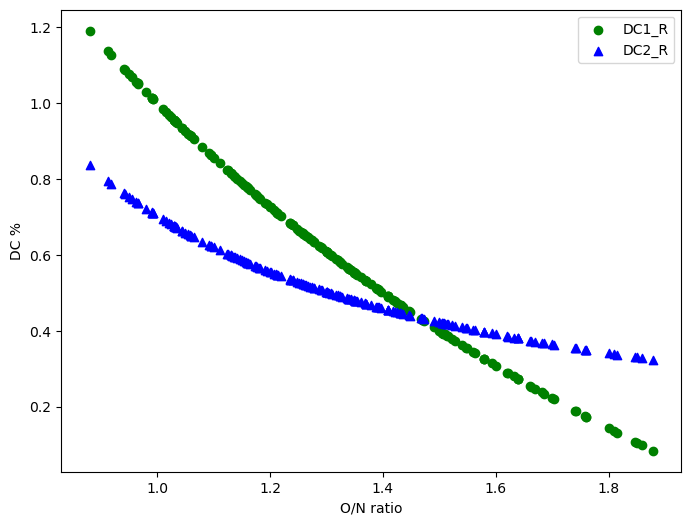

In [6]:
# Plotting the data
plt.figure(figsize=(8, 6))

# Plot DC1
plt.scatter(df_on_R['O/N\n(%)'], df_on_R['DC1_R'], label='DC1_R', color='green', linestyle='None', marker='o')

# Plot DC2
plt.scatter(df_on_R['O/N\n(%)'], df_on_R['DC2_R'], label='DC2_R', color='blue', linestyle='None', marker='^')

# Add legend, labels, and title
plt.legend()
plt.xlabel('O/N ratio')
plt.ylabel('DC %')
#plt.title('DC1 and DC2 comparison with O/N ratio')

# Show plot
plt.show()